# Pandas Practice : Titanic Dataset

The Titanic dataset contains information (gender, age, etc.) of passengers who actually boarded the Titanic.  
Based on this, it is used to predict the survival or survival rate of passengers.

https://www.kaggle.com/competitions/titanic

Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load library


In [2]:
import pandas as pd
from google.colab import drive
import os

## Problem 1 : Load Dataset & store DataFrame

Load 'titanic_train.csv' and store dataframe in a variable `titanic_df`

In [3]:
filename= '/content/drive/MyDrive/AllforOne/Lecture/Day8/Titanic/titanic_train.csv'
titanic_df = pd.read_csv(filename)

In [4]:
type(titanic_df)

pandas.core.frame.DataFrame

Show top 5 lines

<img src = "https://1.bp.blogspot.com/-7r6_GPSB56c/Xti-B3jBxsI/AAAAAAAAAZg/sODqzWZA4y4Bsc0wIybtP6TFb-C3YJQTwCLcBGAsYHQ/s1600/%25E1%2584%2589%25E1%2585%25B3%25E1%2584%258F%25E1%2585%25B3%25E1%2584%2585%25E1%2585%25B5%25E1%2586%25AB%25E1%2584%2589%25E1%2585%25A3%25E1%2586%25BA%2B2020-06-04%2B%25E1%2584%258B%25E1%2585%25A9%25E1%2584%2592%25E1%2585%25AE%2B6.24.35.png">

In [5]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


👀 The columns in the Titanic dataset:

- Survived
- Pclass (Class of ticket)
- Sex
- Age
- Sibsp (The number of brothers/sisters on board)
- Parch (The number of parents/children on board)
- Fare (Cost)
- Embarked (Port)

## Problem 2 : Abstract of dataset

Show Description of DataFrame

In [6]:
titanic_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


- The total number of people on board is 891
- The probability of survival is about 38.4%
- 577 males outnumber females

## Problem 3 : Comparison & Simple function (mean)

Save the average age of female and male in the variable ` titanic_survivor_f` and ` titanic_survivor_m`

((Hint)) `.mean()` function in Pandas dataframe

In [7]:
titanic_survivor_f = titanic_df[titanic_df['Sex'] == 'female']['Age'].mean()
titanic_survivor_m = titanic_df[titanic_df['Sex'] == 'male']['Age'].mean()
titanic_survivor_f, titanic_survivor_m

(27.915708812260537, 30.72664459161148)

((Tip)) We also can use `groupby` and `by`

In [8]:
titanic_df.groupby(by='Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

## Problem 4 : GroupBy

Data needs to be aggregated and summarized in groups during analysis
- `Groupby` used to combine the same values into one to obtain statistics or aggregate results
- Use in the form `DataFrame.groupby`


### Group by column
Group by class

In [9]:
grouped = titanic_df.groupby('Pclass')
print(grouped)
print(type(grouped))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


###Repeating statements for group objects
- Use in the form DataFrame.groupby
- Group objects use a tuple of group names (keys) and data (groups) divided into groups
- If you check the row index number, use the existing row index number as it is

In [10]:
for key, group in grouped:
  print("* key", key)
  print("* count", len(group))
  print(group.head())
  print('\n')

* key 1
* count 216
    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
11           12         1       1   
23           24         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
23                       Sloper, Mr. William Thompson    male  28.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
11      0    113783  26.5500  C103        S  
23      0    113788  35.5000    A6        S  


* key 2
* 

###Basic aggregation functions
- mean,max/min,sum,count,size,var,std...

Get standard deviation of class group

In [11]:
grouped = titanic_df.groupby('Pclass')
grouped.std()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,246.737616,0.484026,14.802856,0.611898,0.693997,78.380373
2,250.852161,0.500623,14.001077,0.601633,0.690963,13.417399
3,264.441453,0.428949,12.495398,1.374883,0.888861,11.778142


Get mean of class group

(only for operational (numeric) columns)

In [12]:
grouped.mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


###General operations for group objects
- Perform operations on the group objects that you create by individual groups
- You can also apply the `get_group()` function to a group object to get only the groups you want from the divided groups
- If you want to base it on multiple columns, it can be used in the form of `dataframe.groupby`

Get only the groups you want to get

((ex)) Only First class

In [13]:
group1 = grouped.get_group(1)
group1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


((ex)) Pclass, Sex

In [14]:
grouped_two = titanic_df.groupby(['Pclass','Sex'])
for key, group in grouped_two:
  print("* key", key)
  print("* count", len(group))
  print(group.head())
  print('\n')

* key (1, 'female')
* count 94
    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
11           12         1       1   
31           32         1       1   
52           53         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
31     Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
52           Harper, Mrs. Henry Sleeper (Myna Haxtun)  female  49.0      1   

    Parch    Ticket      Fare Cabin Embarked  
1       0  PC 17599   71.2833   C85        C  
3       0    113803   53.1000  C123        S  
11      0    113783   26.5500  C103        S  
31      0  PC 17569  146.5208   B78        C  
52      0  PC 17572   76.7292   D33       

# Tip : Visualization

In [15]:
def bar_df(colname):
    global titanic_df
    surv = titanic_df[titanic_df['Survived']==1][colname].value_counts()
    dead = titanic_df[titanic_df['Survived']==0][colname].value_counts()
    sd = pd.DataFrame([surv,dead], index=['Survived','dead'])
    return sd

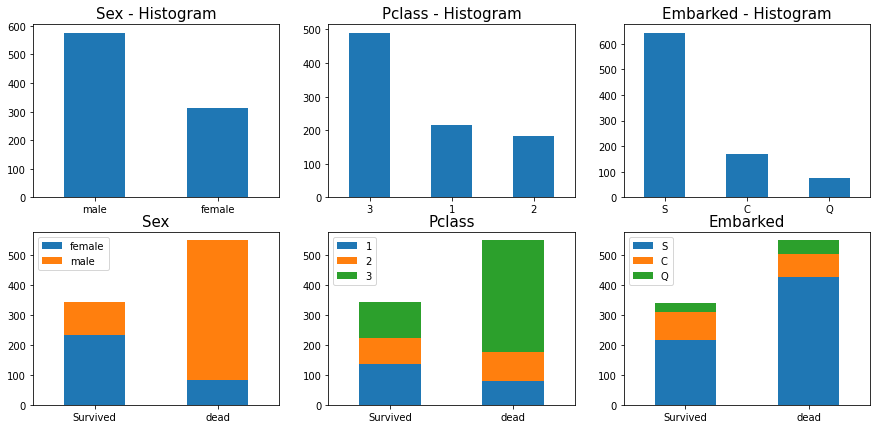

In [16]:
import matplotlib.pyplot as plt

eda_cols =['Sex','Pclass','Embarked']
fig = plt.figure(figsize=(15,7))

for i in range(len(eda_cols)):
    ax1 = plt.subplot(2,len(eda_cols),i+1)
    titanic_df[eda_cols[i]].value_counts().plot(kind='bar', ax=ax1)

    plt.title(eda_cols[i] + " - Histogram", fontsize=15)
    plt.xticks(rotation=0)
    
    ax2 = plt.subplot(2,len(eda_cols),i+4)
    bar_df(eda_cols[i]).plot(kind='bar', stacked=True, ax=ax2)
    
    plt.title(eda_cols[i], fontsize=15)
    plt.xticks(rotation=0)

plt.show()